In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
test_data=pd.read_csv('/content/Titanic_test.csv')
train_data=pd.read_csv('/content/Titanic_train.csv')

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Data Exploration:

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- BASIC inference
  * In both train dataset and test data contains missing values
  * some features need to drop as they don't serve any purpose while predicting
  * some features need to change it's data type from categorical to numerical
  * need to treat ourliers if any

Visualization and basic statistics will be doing after data cleaning

# 2. Data Preprocessing:

In [15]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [17]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
test_data['Sex']=le.fit_transform(test_data['Sex'])

In [19]:
Le=LabelEncoder()
train_data['Embarked']=Le.fit_transform(train_data['Embarked'])
test_data['Embarked']=Le.fit_transform(test_data['Embarked'])

In [20]:
train_data=train_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
test_data=test_data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [21]:
train_data.duplicated().sum()

111

In [22]:
test_data.duplicated().sum()

38

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [24]:
def train_outlier():
  train_data_outliers=[]
  for column in train_data.columns:
    q1=train_data[column].quantile(0.25)
    q3=train_data[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    train_data_outlier=train_data[(train_data[column]<lower_bound)|(train_data[column]>upper_bound)].index
    train_data_outliers.extend(train_data_outlier)
  train_data_outliers=list(set(train_data_outliers))
  clean_train_data=train_data.drop(train_data_outliers)
  return clean_train_data

In [25]:
def test_outlier():
  test_data_outliers=[]
  for column in test_data.columns:
    Q1=test_data[column].quantile(0.25)
    Q3=test_data[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    Upper_bound=Q3+1.5*IQR
    test_data_outlier=test_data[(test_data[column]<Lower_bound)|(test_data[column]>Upper_bound)].index
    test_data_outliers.extend(test_data_outlier)
    test_data_outliers=list(set(test_data_outliers))
  clean_test_data=test_data.drop(test_data_outliers)
  return clean_test_data

In [26]:
clean_train_data=train_outlier()
clean_test_data=test_outlier()

# 1.c Create visualizations

## visualization of clean train data

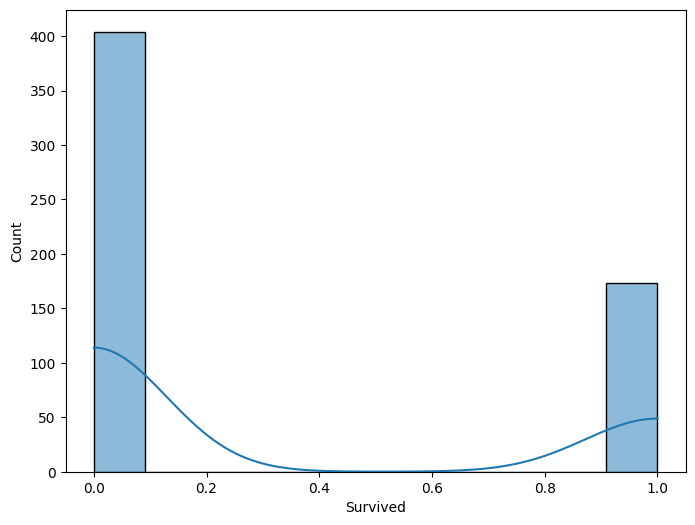

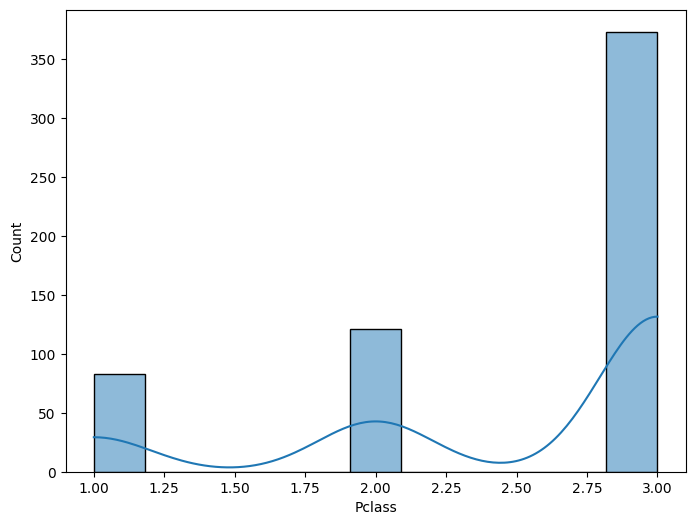

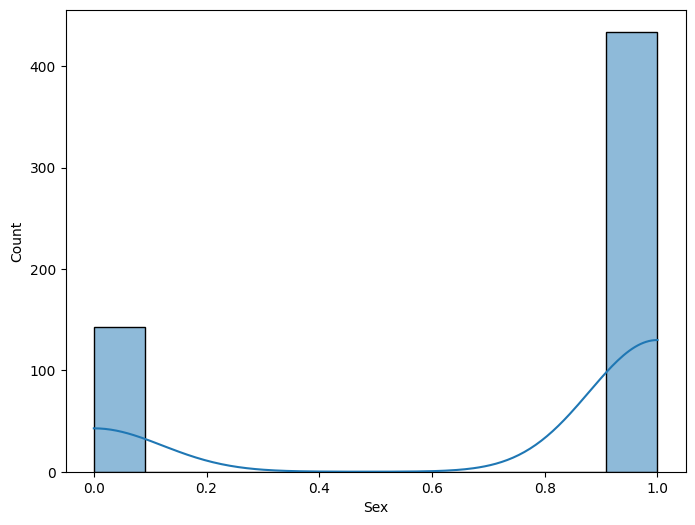

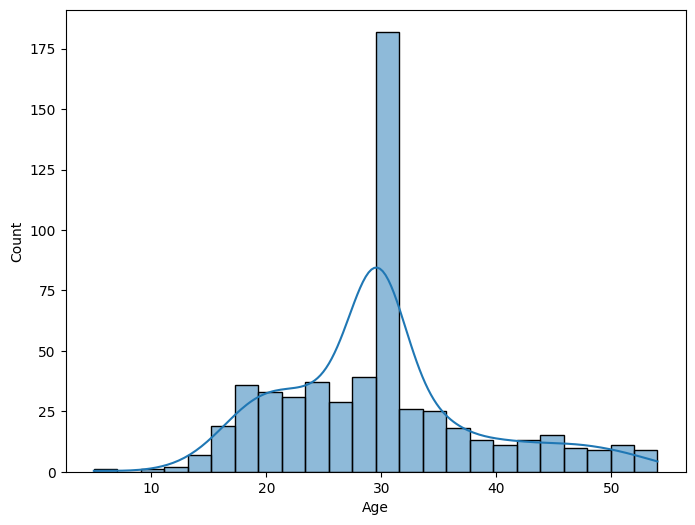

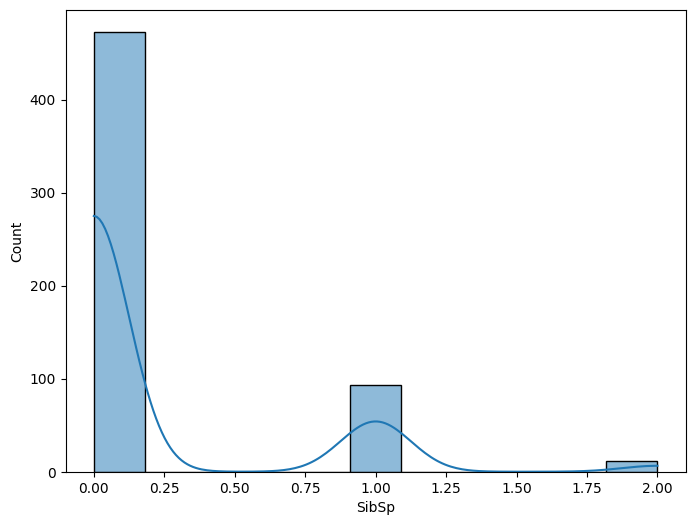

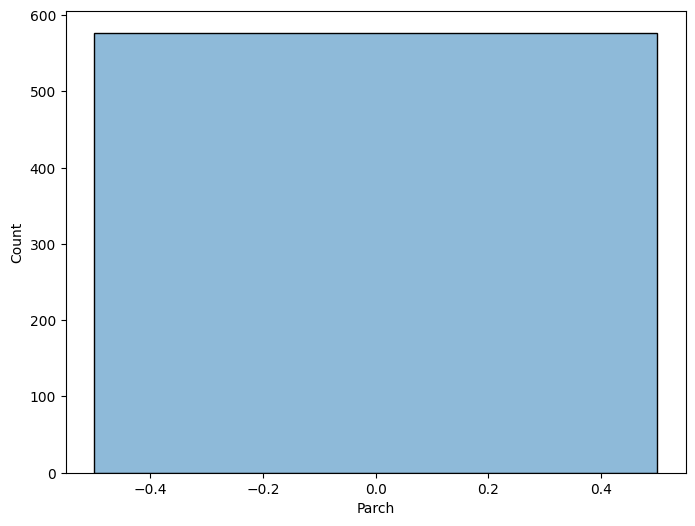

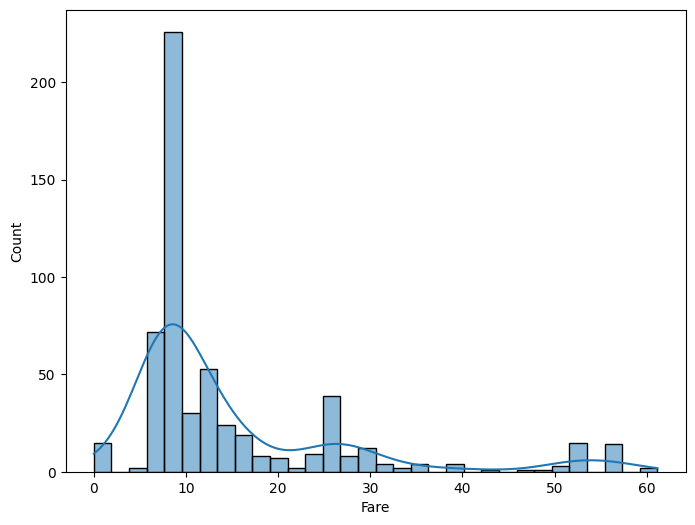

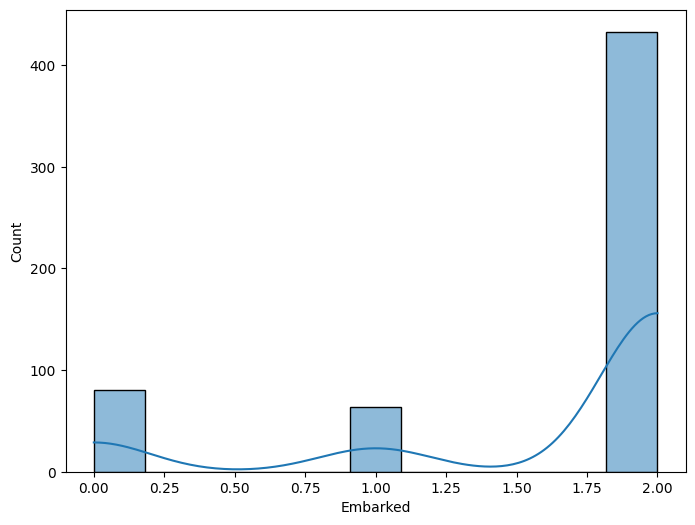

In [27]:
for column in clean_train_data.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(clean_train_data[column],kde=True)

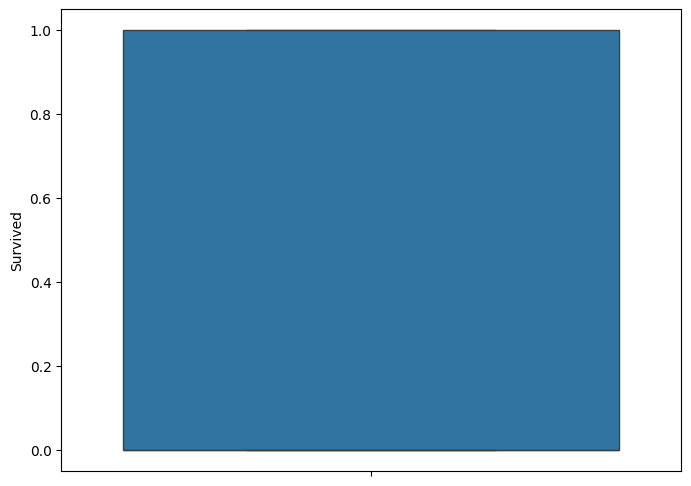

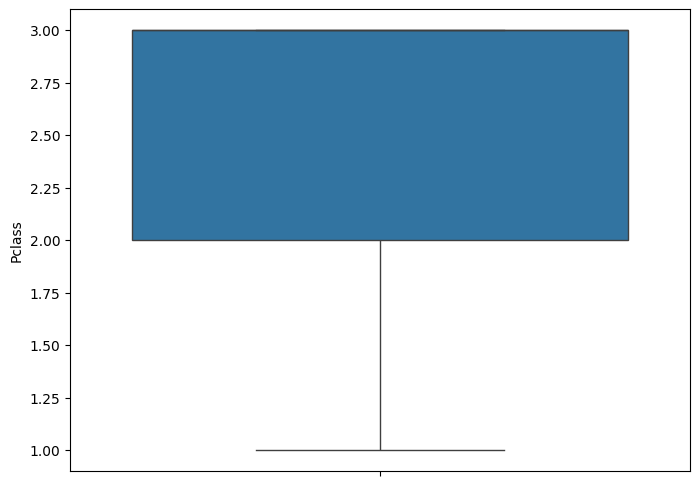

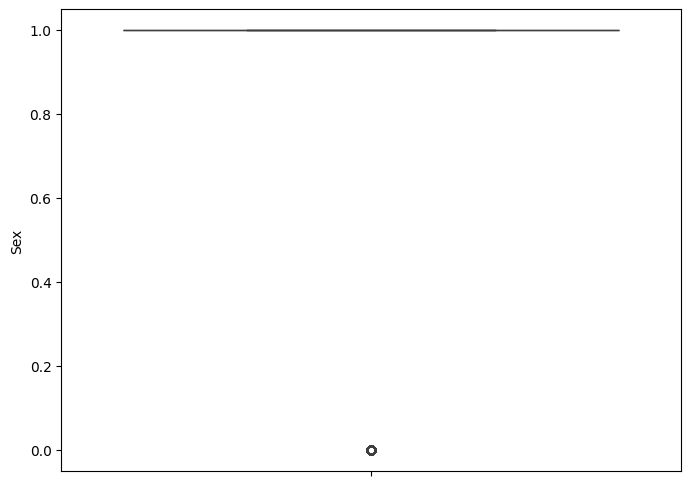

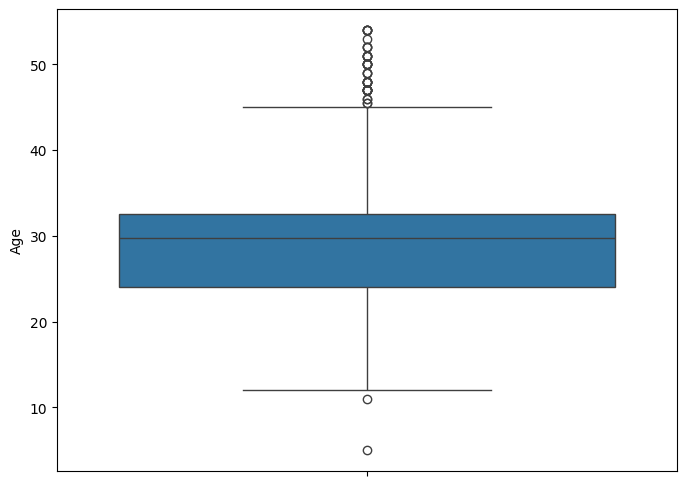

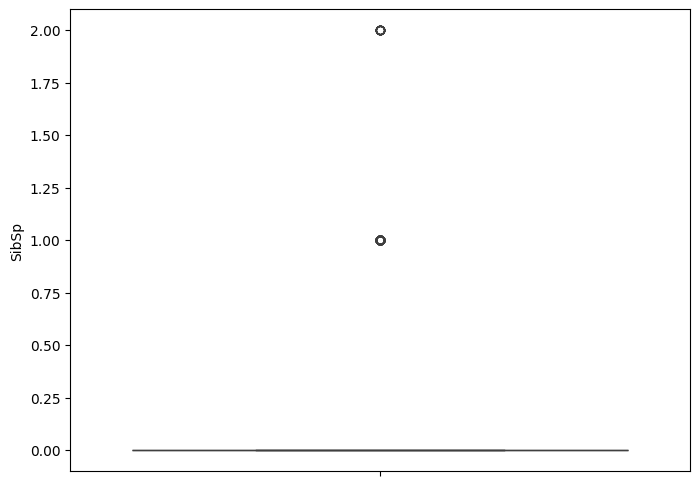

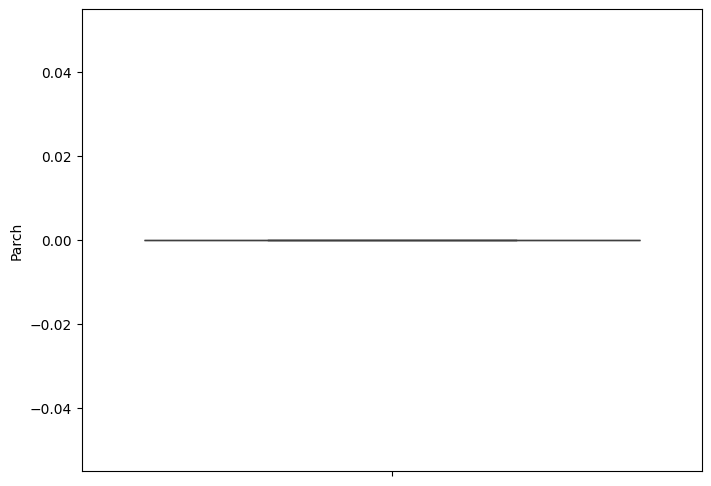

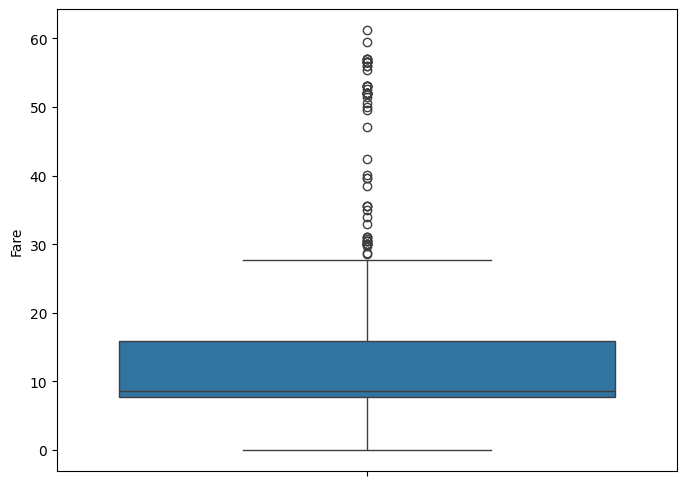

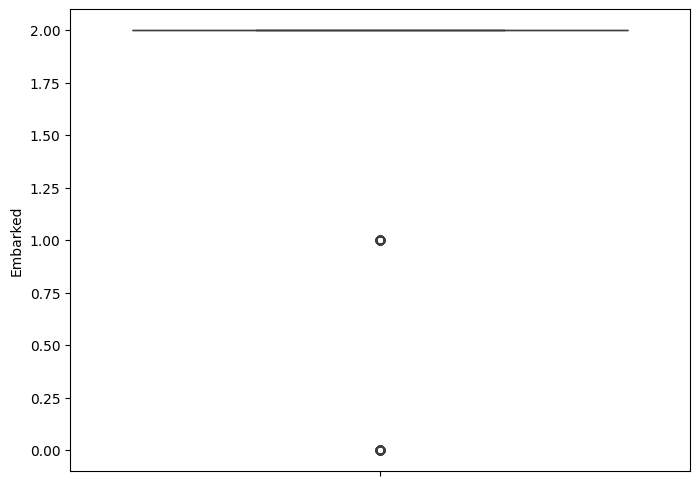

In [28]:
for column in clean_train_data.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(clean_train_data[column])

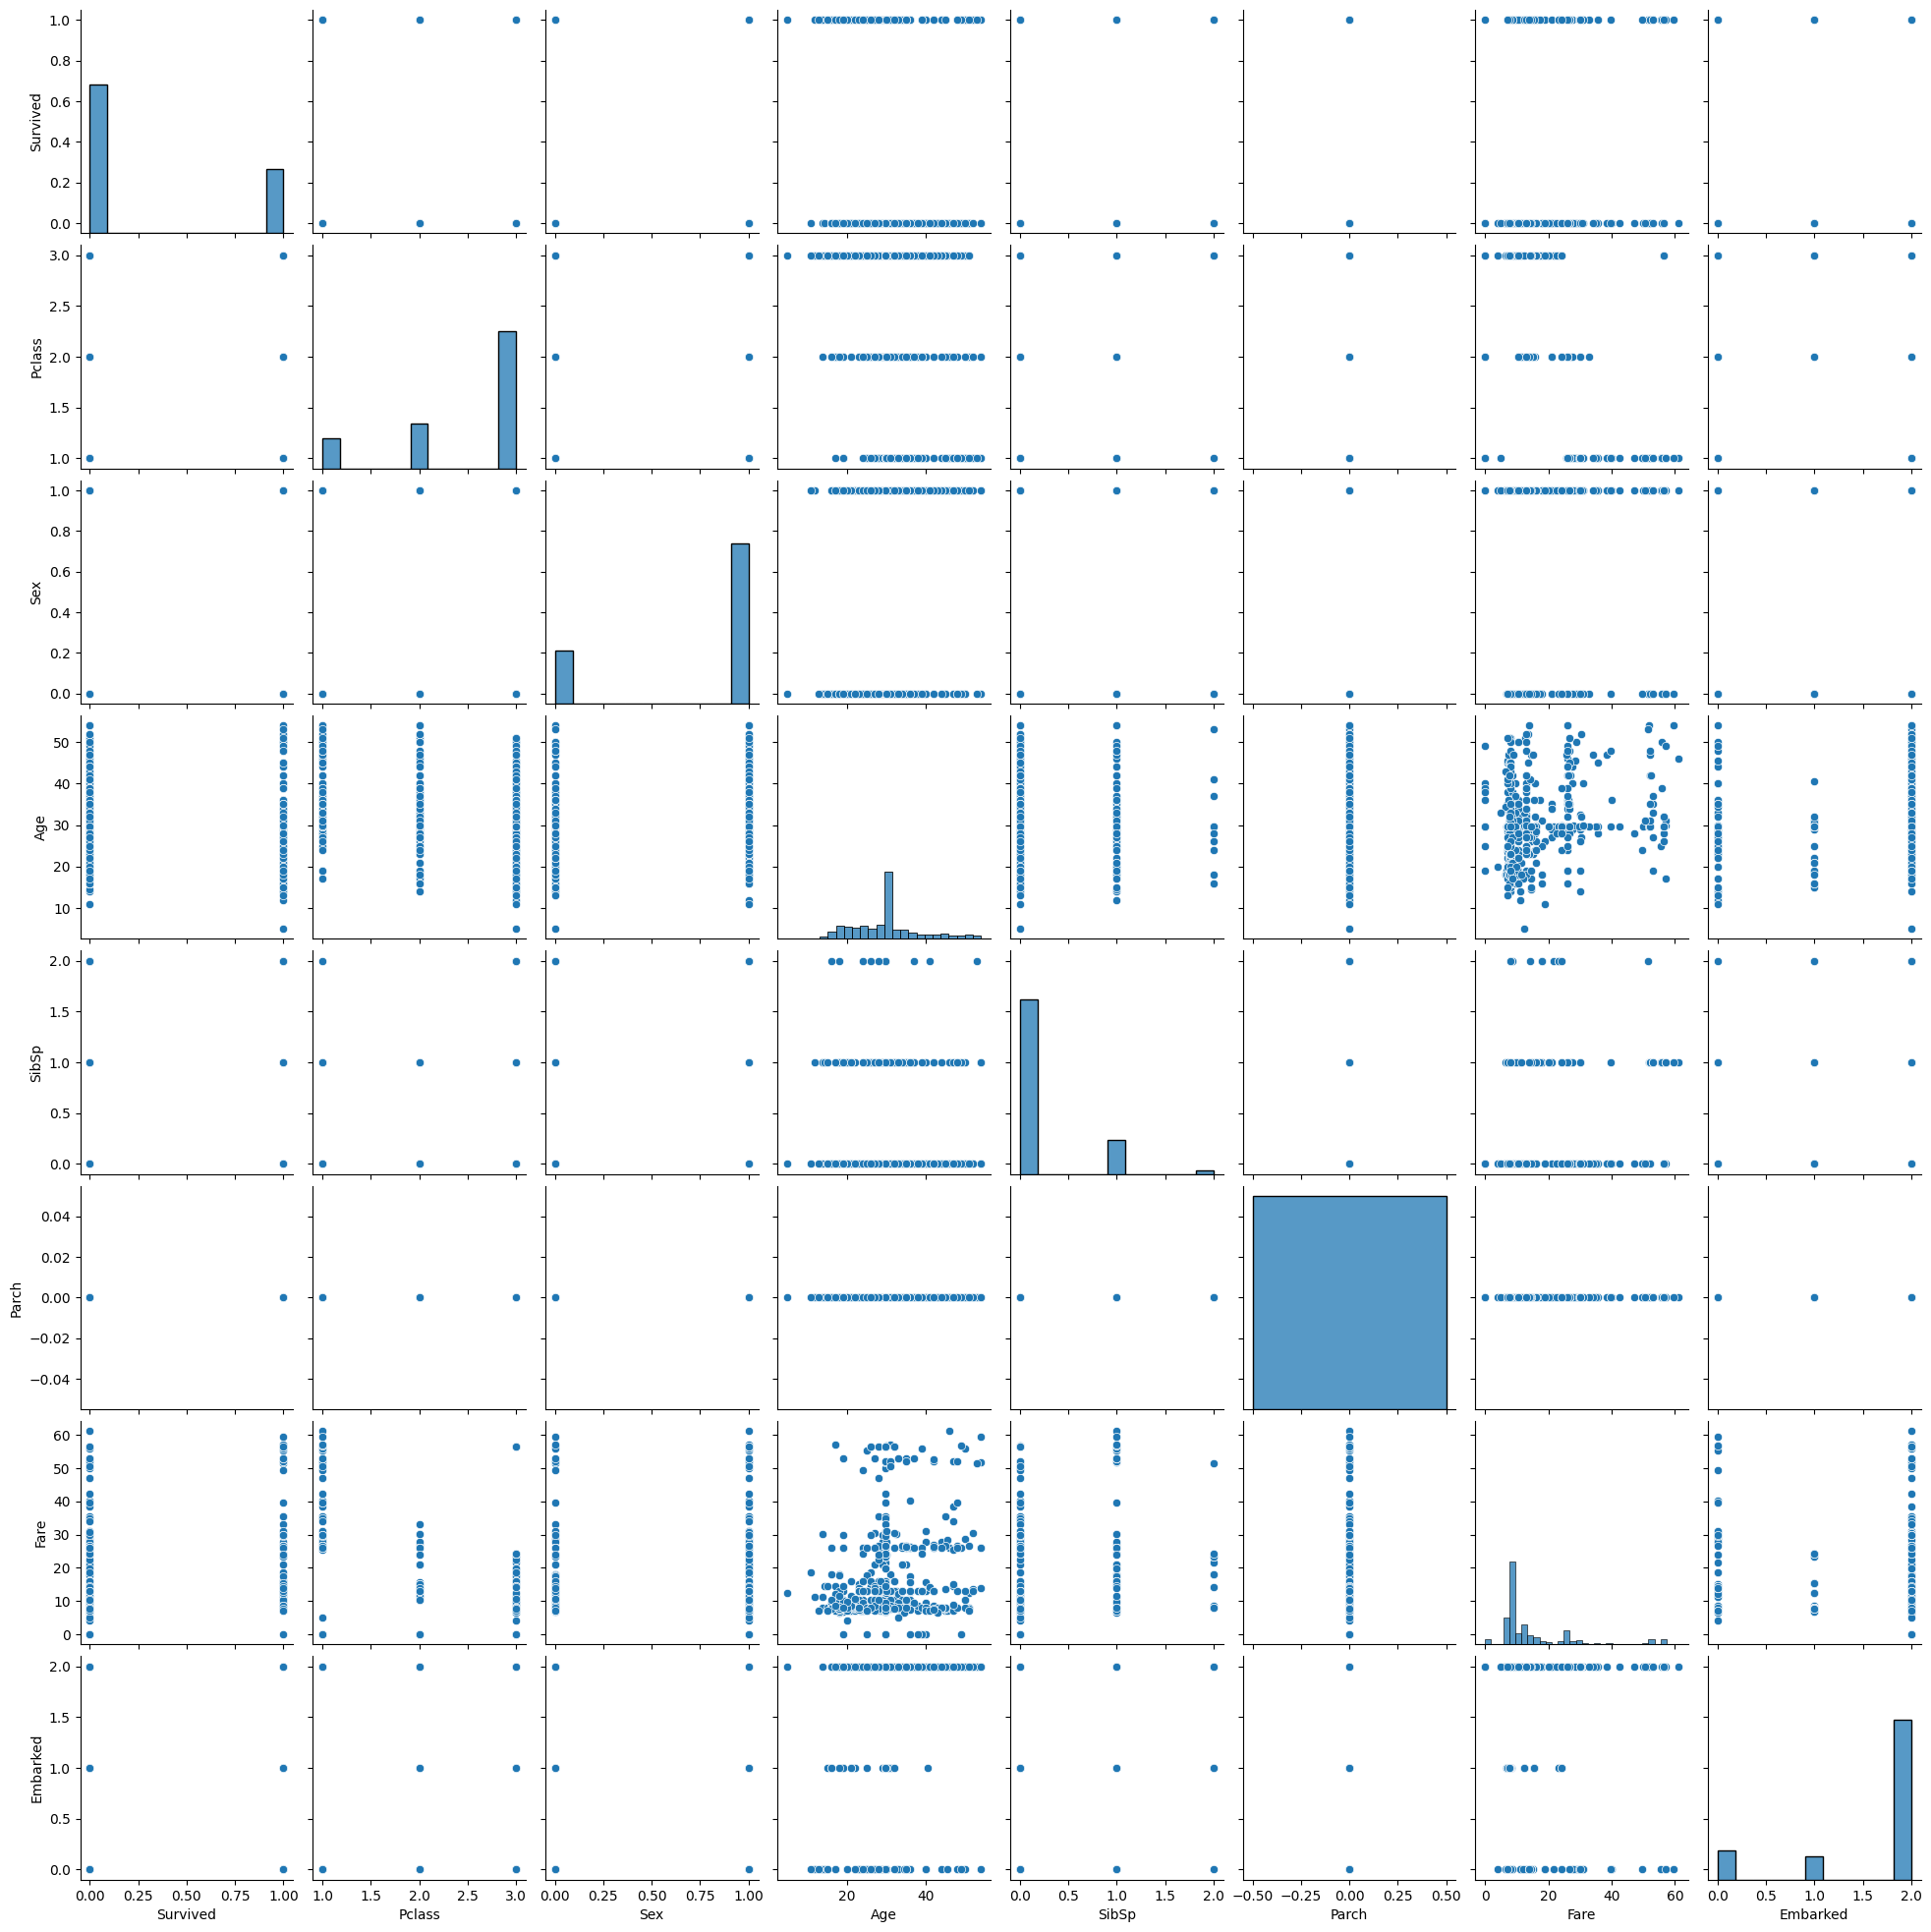

In [29]:
sns.pairplot(clean_train_data)
plt.show()

## Visualization of clean test data

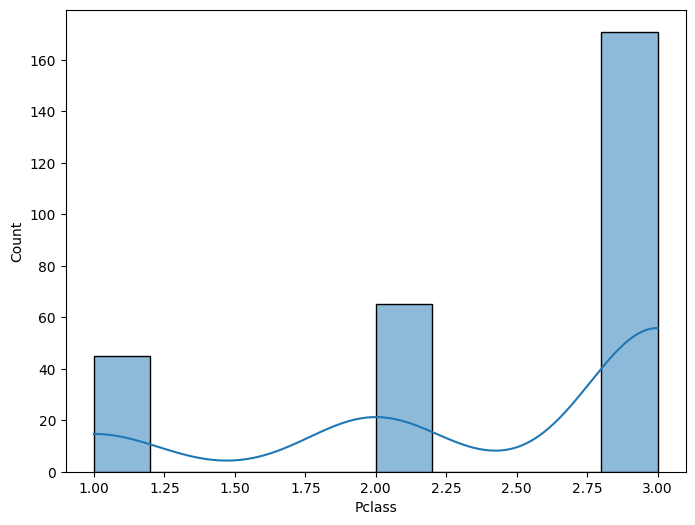

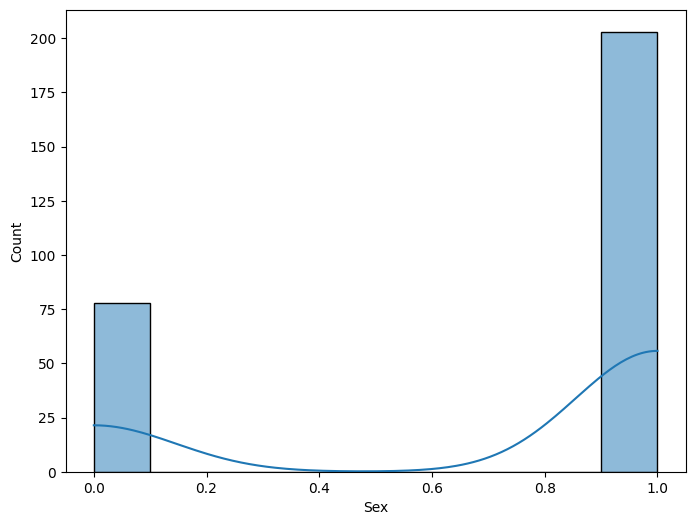

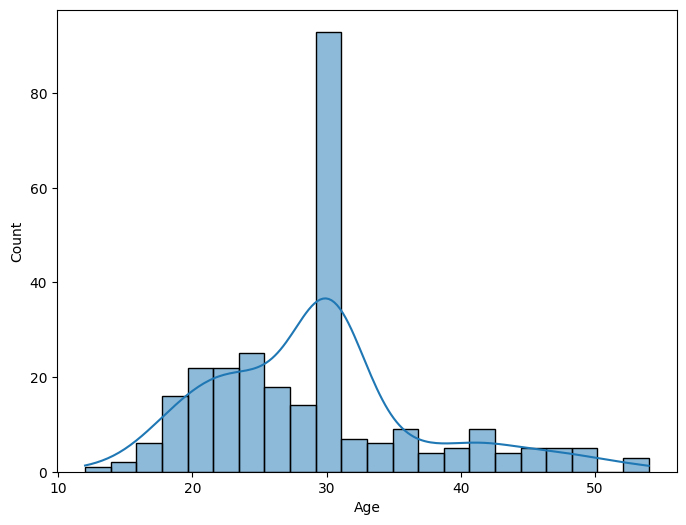

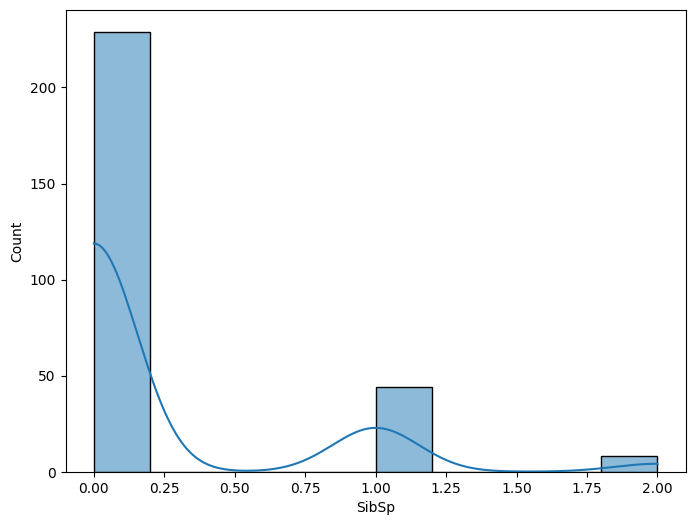

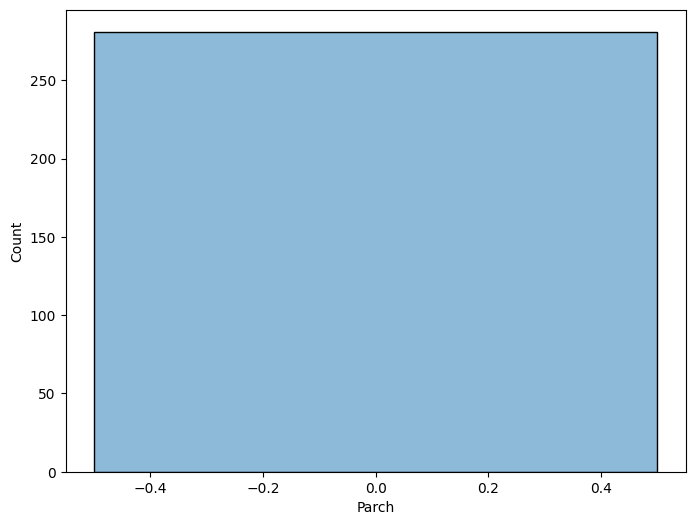

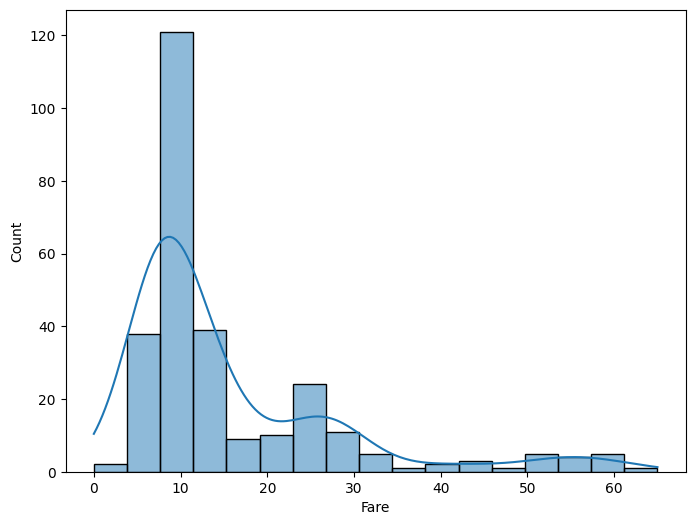

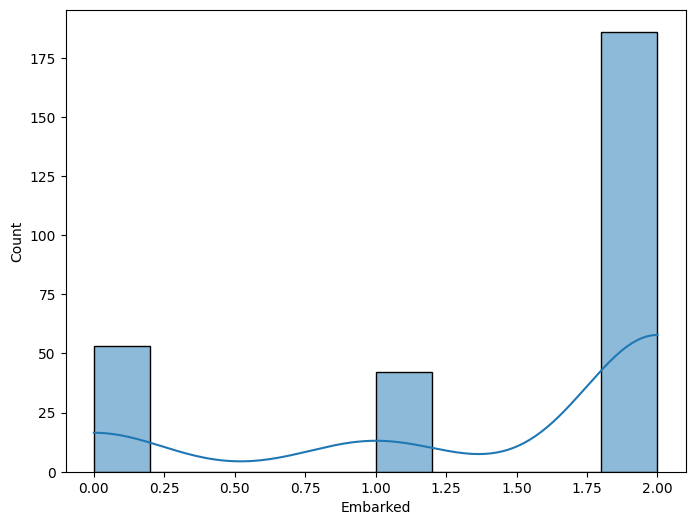

In [30]:
for column in clean_test_data.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(clean_test_data[column],kde=True)

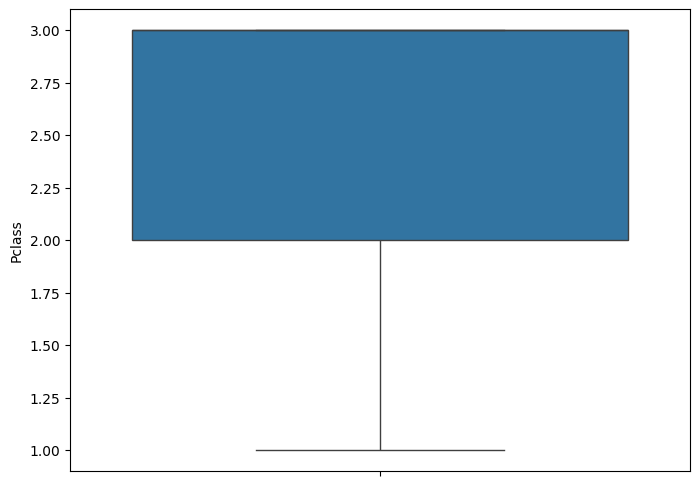

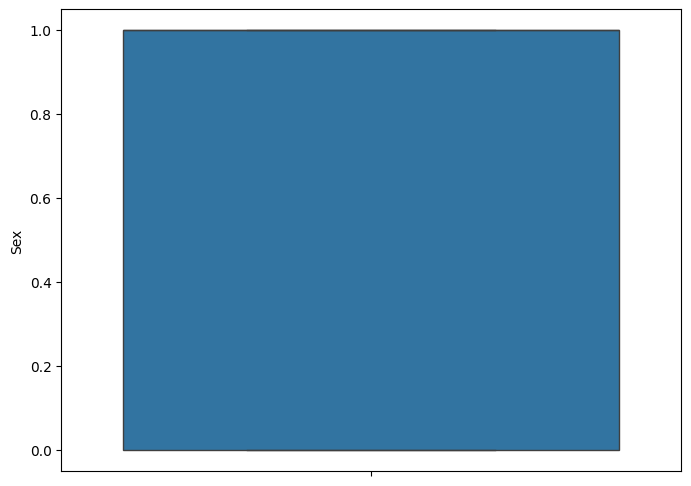

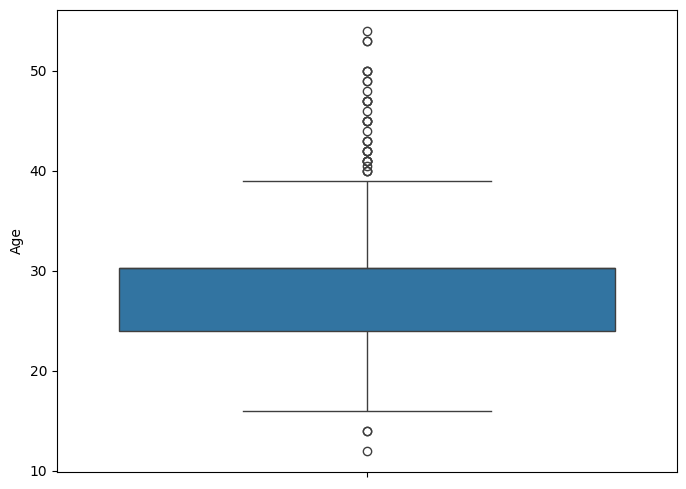

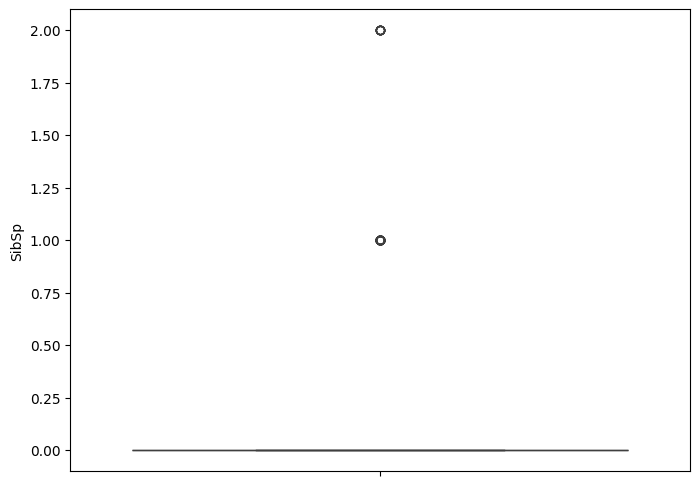

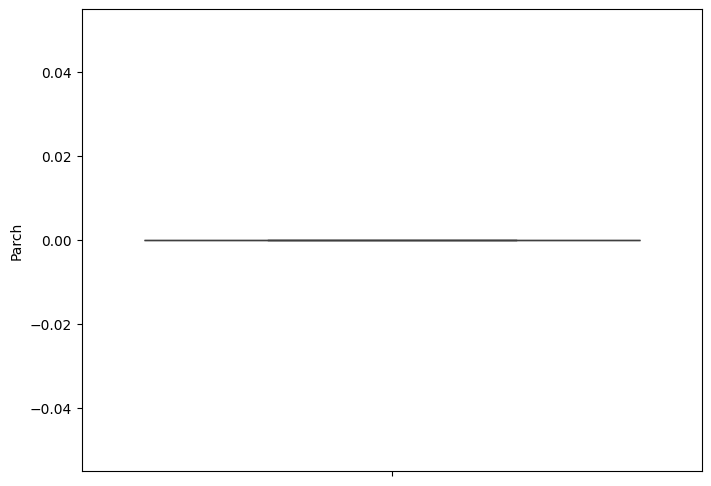

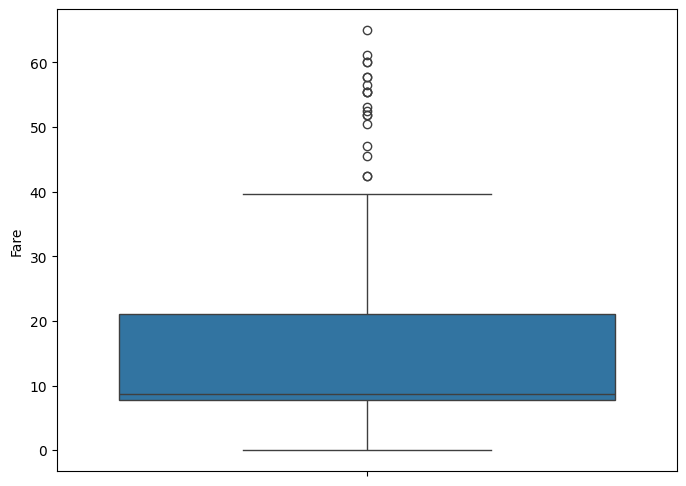

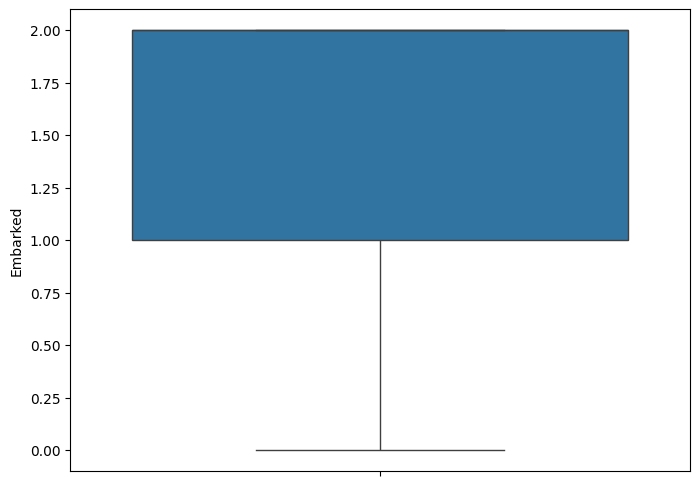

In [31]:
for column in clean_test_data.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(clean_test_data[column])

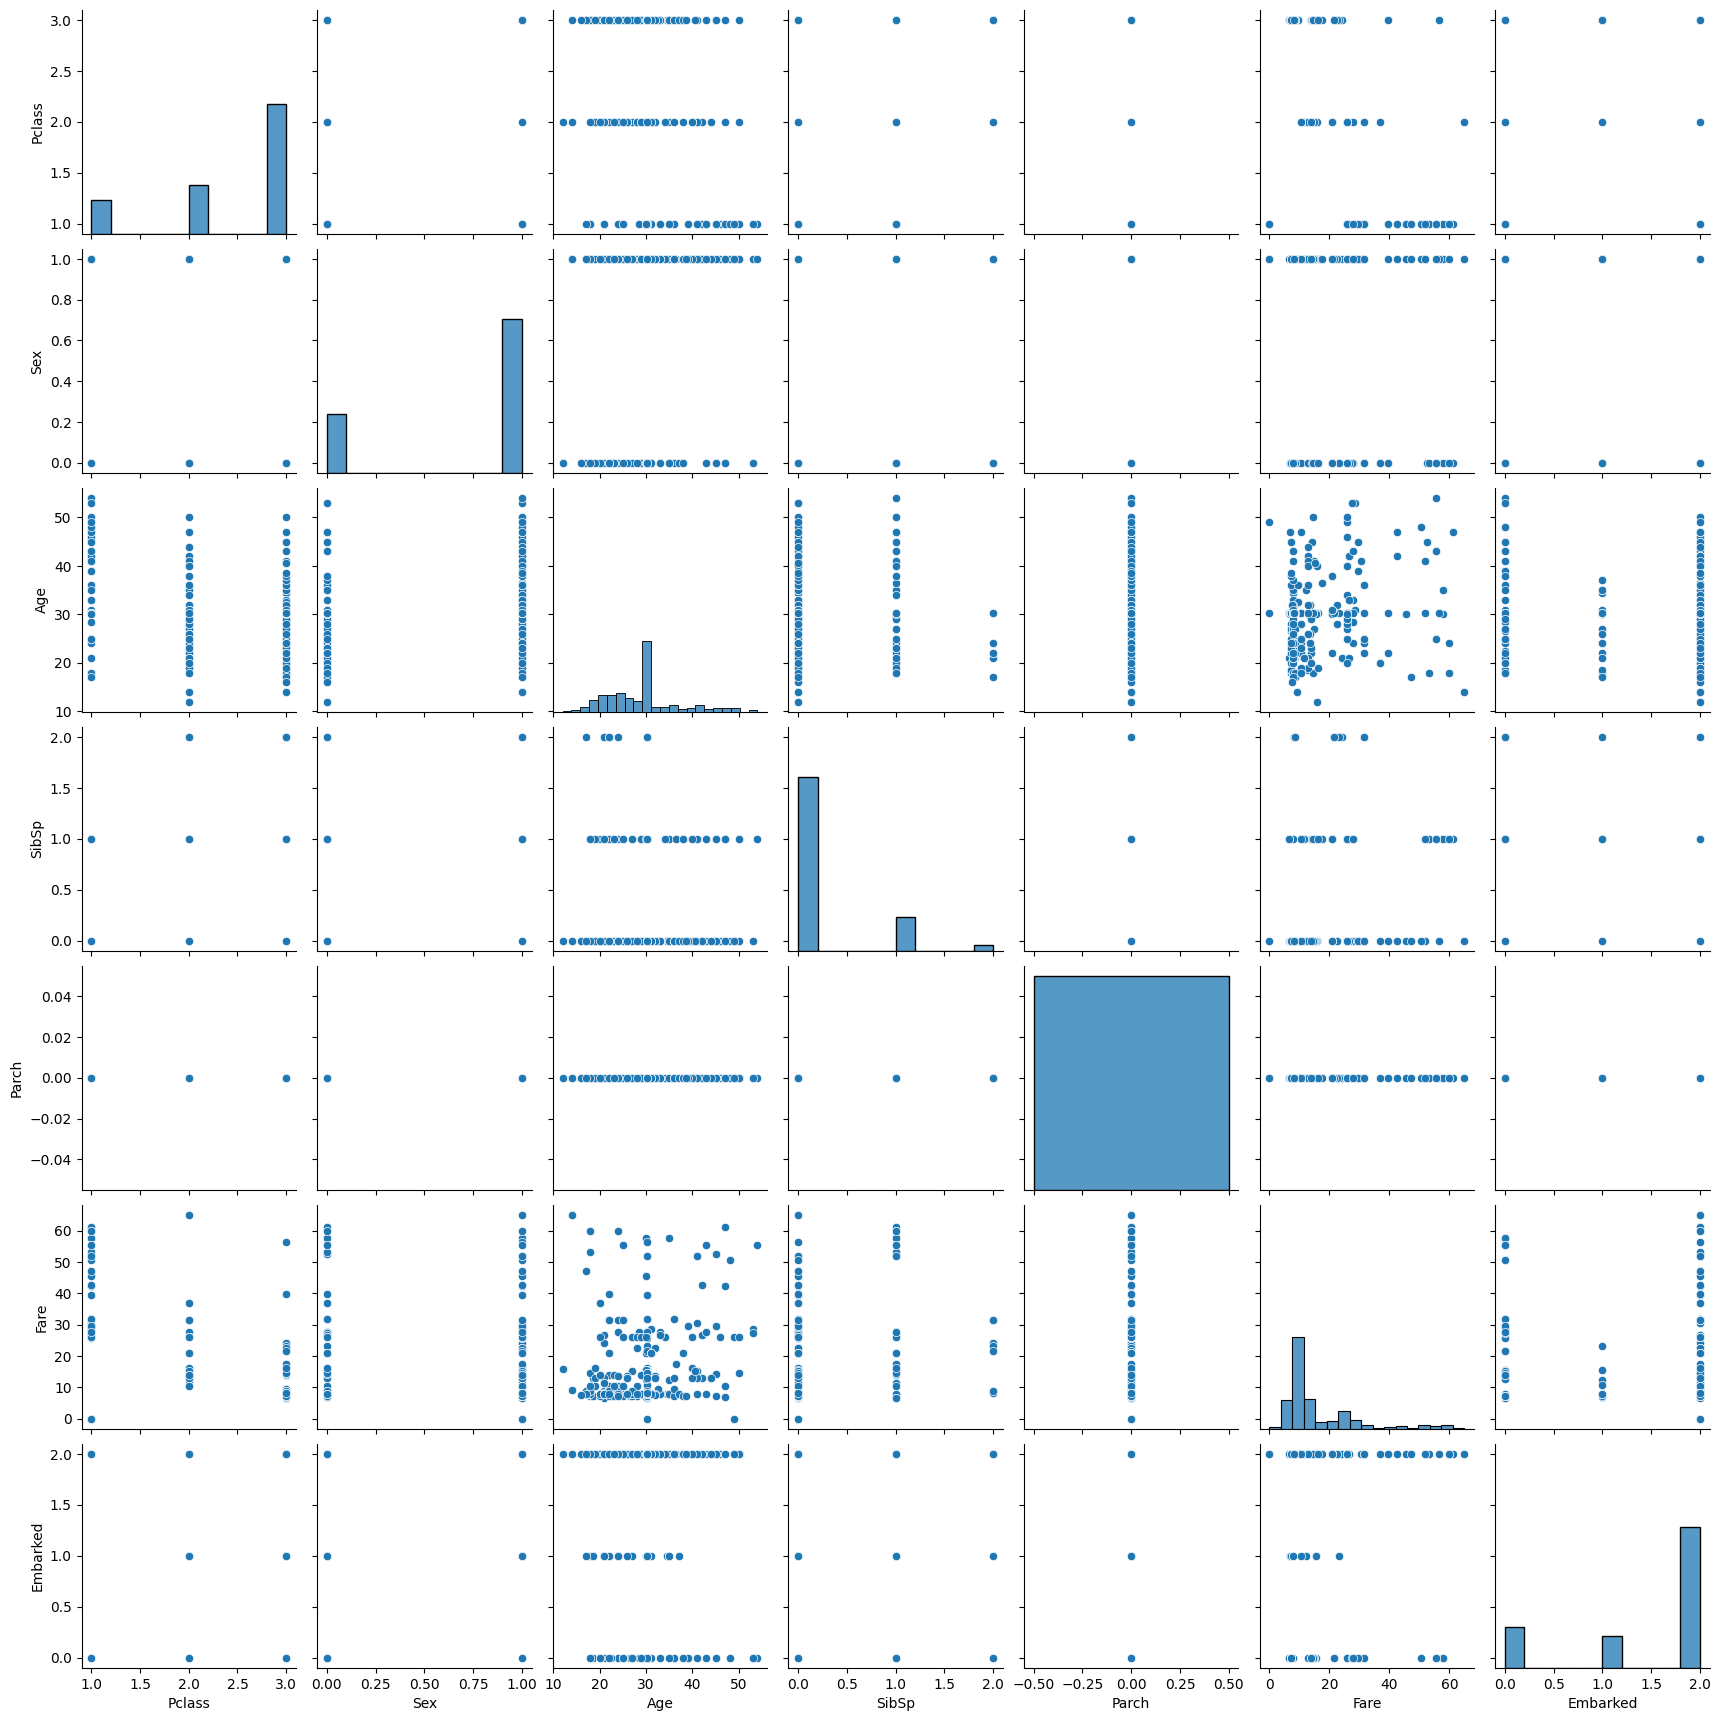

In [32]:
sns.pairplot(clean_test_data)
plt.show()

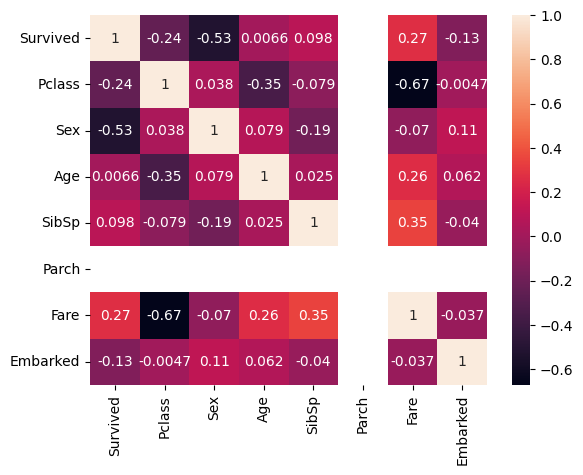

In [33]:
sns.heatmap(clean_train_data.corr(),annot=True)
plt.show()

<Axes: >

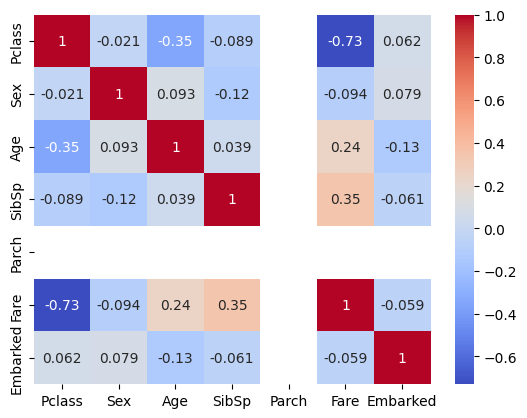

In [34]:
sns.heatmap(clean_test_data.corr(),annot=True,cmap='coolwarm')

# 3. Model Building:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
x=clean_train_data.drop('Survived',axis=1)
y=clean_train_data['Survived']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=LR.predict(x_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88        86
           1       0.66      0.63      0.64        30

    accuracy                           0.82       116
   macro avg       0.76      0.76      0.76       116
weighted avg       0.82      0.82      0.82       116



In [42]:
accuracy_score(y_pred,y_test)

0.8189655172413793

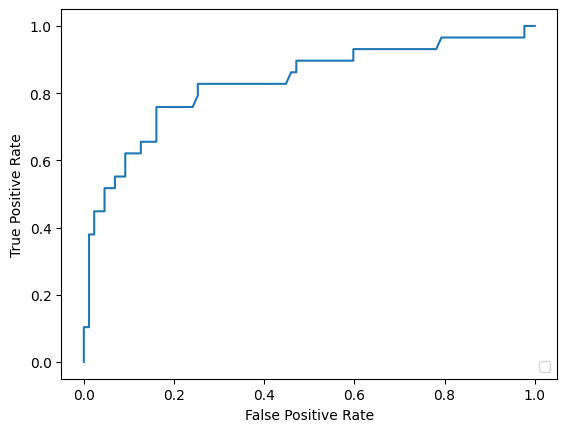

In [43]:
from sklearn.metrics import roc_curve, RocCurveDisplay
y_pred_proba = LR.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

In [44]:
import pickle

In [45]:
pickle_out=open('model.pkl','wb')
pickle.dump(LR,pickle_out)
pickle_out.close()